In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
!pip install xgboost
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 10.2/124.9 MB 57.9 MB/s eta 0:00:02
   -------- ------------------------------- 26.2/124.9 MB 69.2 MB/s eta 0:00:02
   --------------- ------------------------ 47.2/124.9 MB 79.0 MB/s eta 0:00:01
   ---------------- ----------------------- 50.3/124.9 MB 78.2 MB/s eta 0:00:01
   ------------------- -------------------- 61.9/124.9 MB 61.6 MB/s eta 0:00:02
   ------------------------ --------------- 75.8/124.9 MB 62.8 MB/s eta 0:00:01
   ----------------------------- ---------- 92.8/124.9 MB 65.1 MB/s eta 0:00:01
   ------------------------------------ -- 115.3/124.9 MB 70.8 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 73.1 MB/s eta 0:00:01
   --------------------------------------- 124.9/124.9 MB 68.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 25.2 

In [18]:
# Load dataset from CSV file
df = pd.read_csv('Spotify Most Streamed Songs.csv')
df.head()  # Display the first few rows of the dataset for an overview

# Drop unnecessary columns that are not needed for analysis or modeling
df = df.drop(['cover_url', 'track_name', 'artist(s)_name', 'released_year', 'released_month', 
              'released_day', 'artist_count', 'in_spotify_charts', 'in_apple_charts', 
              'in_deezer_charts', 'in_shazam_charts', 'in_spotify_playlists', 
              'in_apple_playlists', 'in_deezer_playlists'], axis=1)

df_dropped = [ 'cover_url', 'track_name', 'artist(s)_name', 'released_year', 'released_month', 
              'released_day', 'artist_count', 'in_spotify_charts', 'in_apple_charts', 
              'in_deezer_charts', 'in_shazam_charts', 'in_spotify_playlists', 
              'in_apple_playlists', 'in_deezer_playlists'
            ]

df_dropped = pd.DataFrame(df_dropped)

df.head()

# Check for missing values in the dataset
df.isna().sum()

# Drop rows with missing values for simplicity
df = df.dropna()

# Convert 'streams' column to numeric, coercing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Fill NaN values in 'streams' column with 0 and convert to integer
df['streams'] = df['streams'].fillna(0).astype(np.int64)

# Initialize LabelEncoder to encode categorical columns into numeric values
le = LabelEncoder()

# Encode the 'key' and 'mode' columns as these are categorical
df['key'] = le.fit_transform(df['key'])
df['mode'] = le.fit_transform(df['mode'])

df.head()

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,2,0,80,89,83,31,0,8,4
1,133716286,92,3,0,71,61,74,7,0,10,4
2,140003974,138,7,0,51,32,53,17,0,31,6
3,800840817,170,0,0,55,58,72,11,0,11,15
4,303236322,144,0,1,65,23,80,14,63,11,6


This code preprocesses the Spotify dataset to prepare it for analysis and modeling. We began by loading the dataset and removing unnecessary columns (such as metadata and chart-related indicators), to focus on the fundamental features of the music. Missing values are handled by dropping incomplete rows, and the 'streams' column is cleaned by converting it to a numeric format, filling missing values with zeros, and converting the data type to integers. Categorical variables like 'key' and 'mode' are encoded into numeric values using LabelEncoder to ensure compatibility. We then printed out the header of refined dataset to ensure that we retained all the features we wanted, and the catagorical values have been changed to numerical (key and mode).

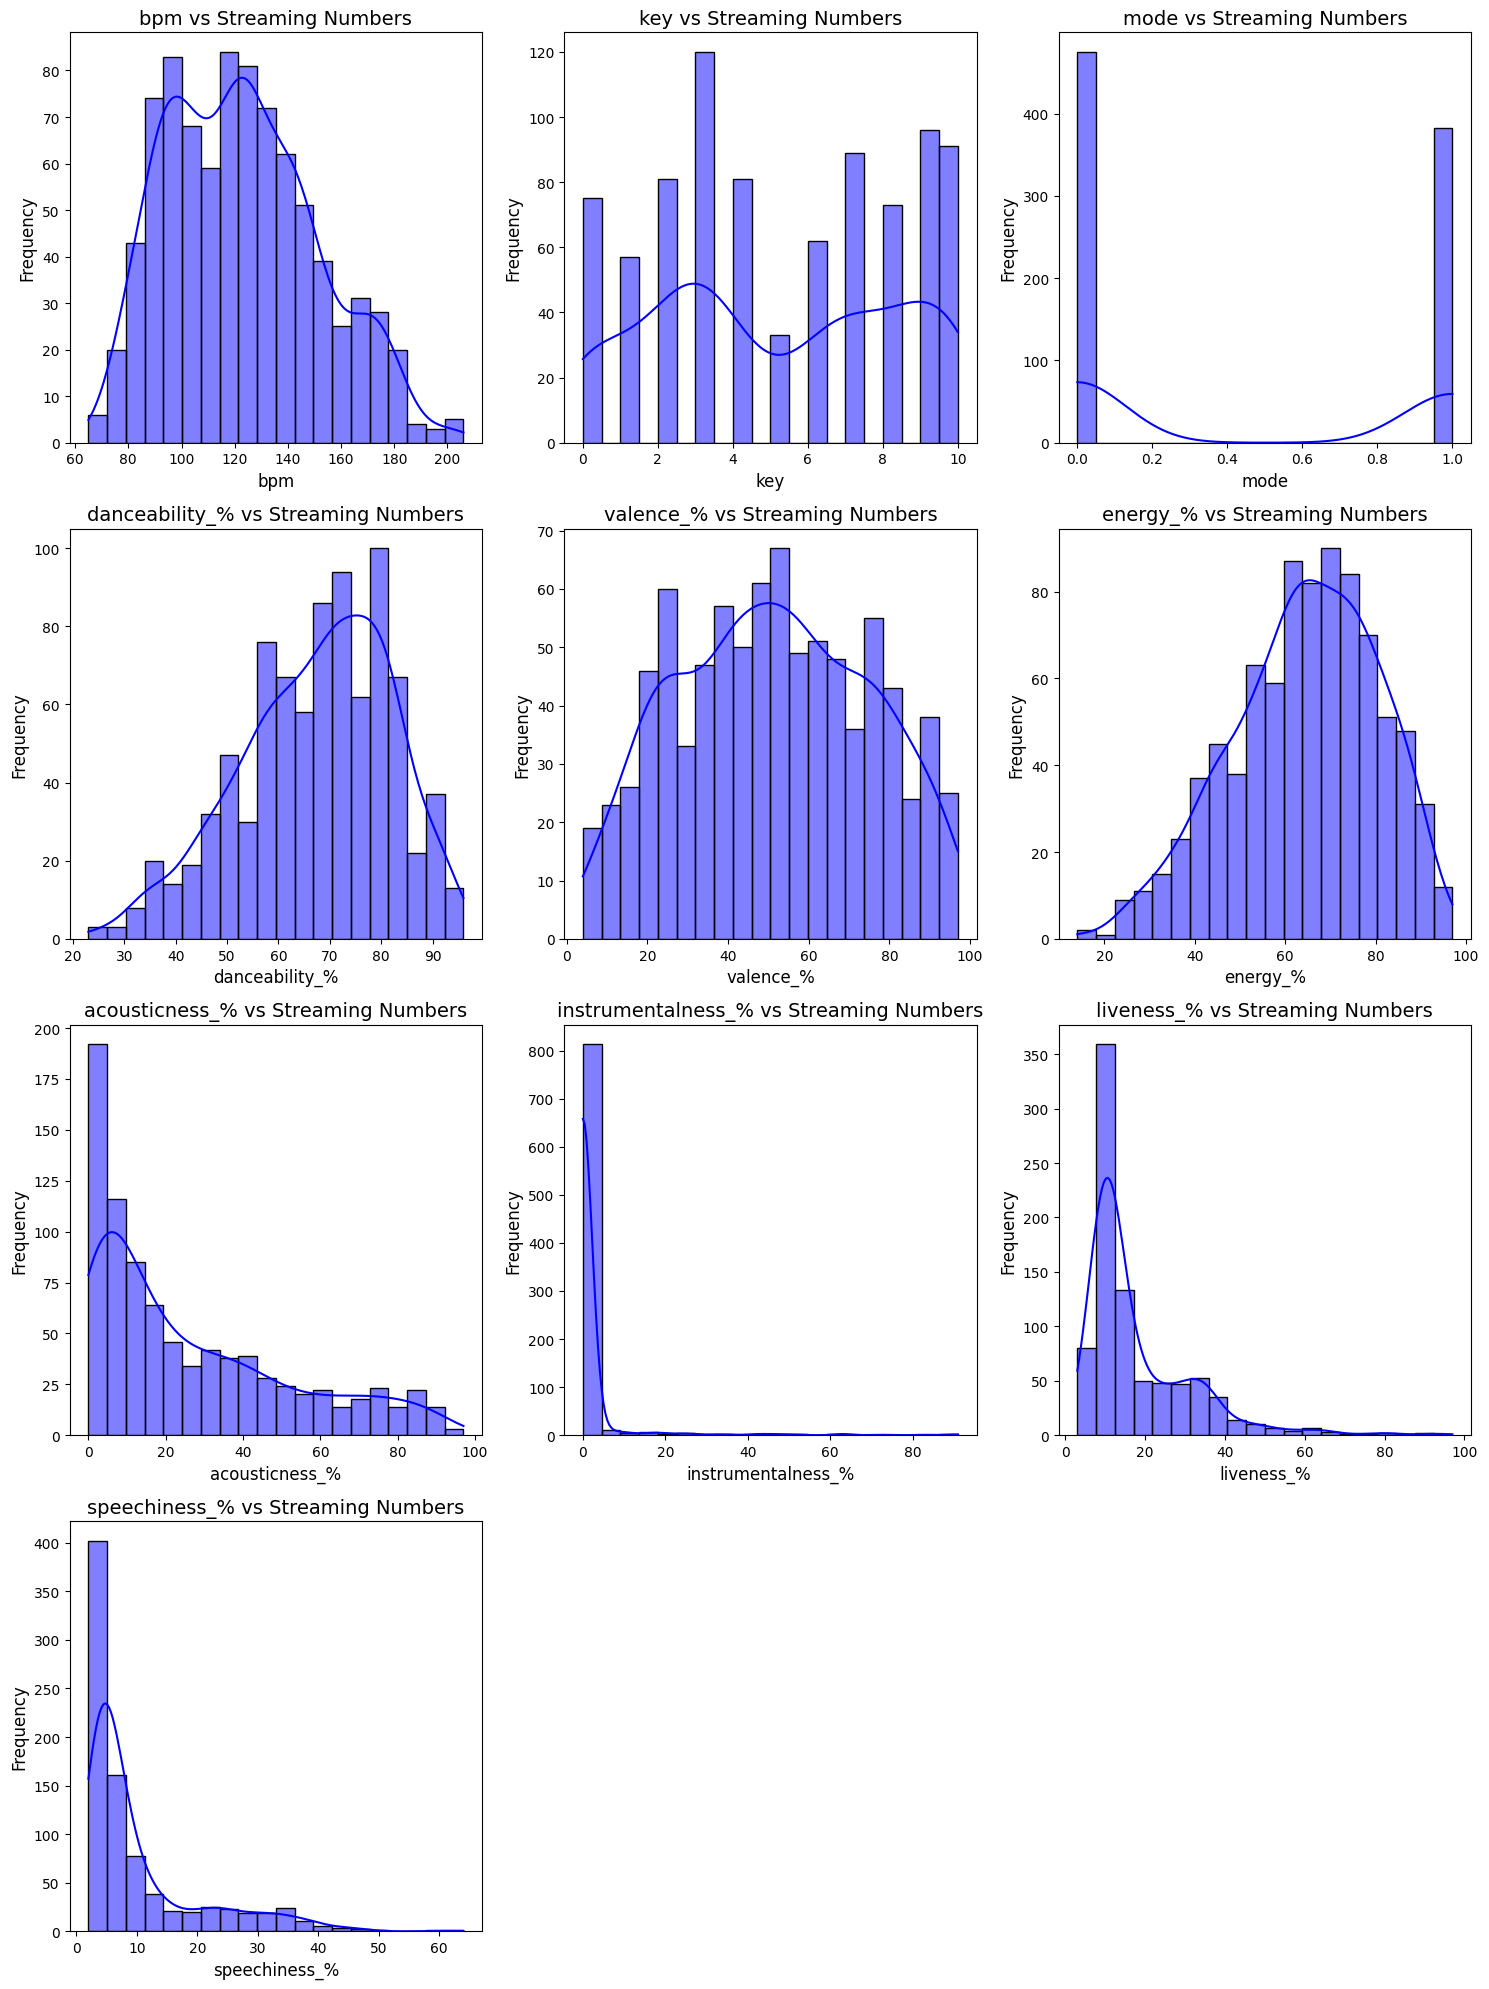

In [21]:
features = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',	
            'instrumentalness_%', 'liveness_%',	'speechiness_%']

# Adjust the layout to fit 3 plots per row

# Plot distributions of each feature against streaming numbers
plot_per_row = 3  # Number of plots per row
rows = math.ceil(len(features) / plot_per_row)  # Calculate the number of rows

fig, axes = plt.subplots(nrows=rows, ncols=plot_per_row, figsize=(15, 5 * rows))

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.histplot(
        data=df, x=feature, bins=20, ax=axes[idx], kde=True, color="blue", edgecolor="black"
    )
    axes[idx].set_title(f"{feature} vs Streaming Numbers", fontsize=14)
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplots
for idx in range(len(features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

This section helps us visualize the distribution of the 'fundamental' features that we outline previously from the dataset and their relationship with streaming numbers. We created a grid of histograms with KDE curves to help identify some general trends before conducting any feature refining or analysis. This output of graphs helped us see the distribution within the music industry and where the majority of the songs in our dataset are found in each of the features. 

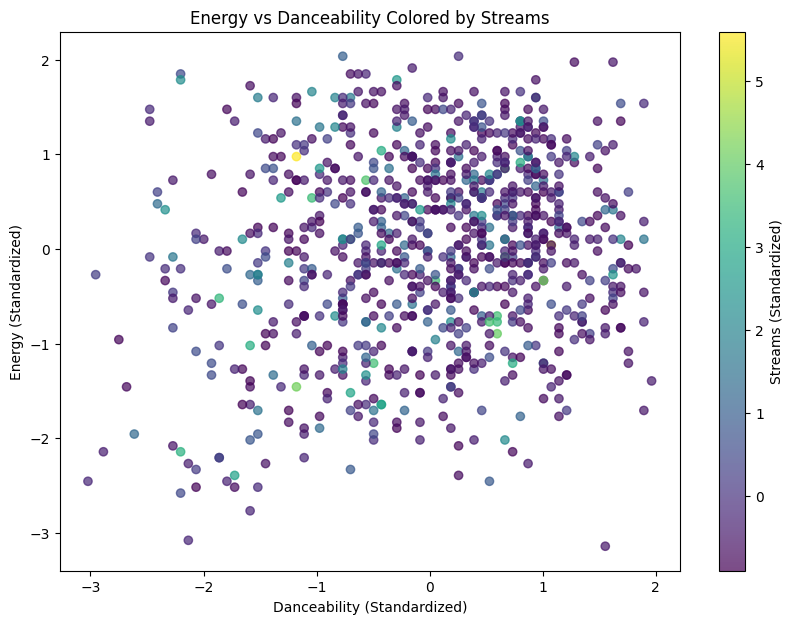

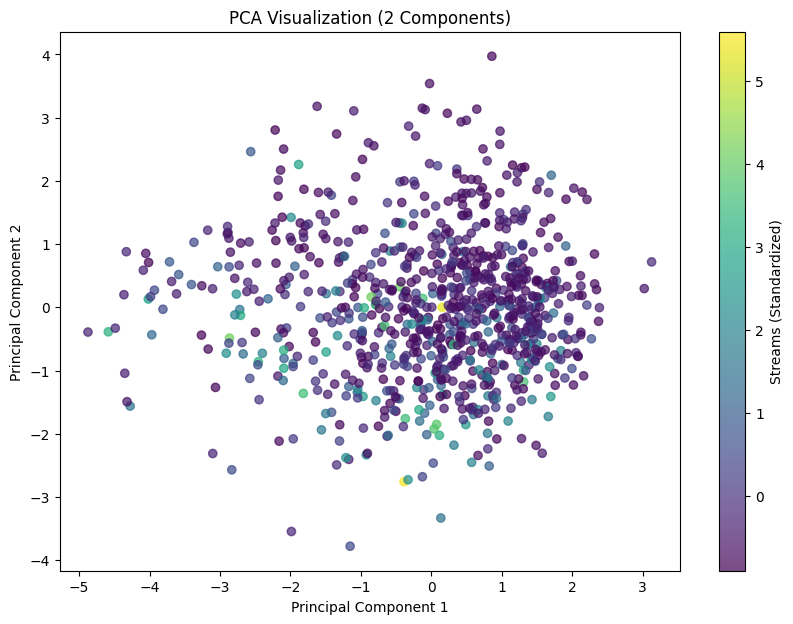

In [25]:
# Define numerical columns for analysis
numerical_columns = [
    'streams', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Convert streams to numeric if needed
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])

# Standardize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# --- Plot 1: Energy vs Danceability ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['danceability_%'],
    df['energy_%'],
    c=df['streams'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Streams (Standardized)')
plt.title('Energy vs Danceability Colored by Streams')
plt.xlabel('Danceability (Standardized)')
plt.ylabel('Energy (Standardized)')
plt.show()

# --- PCA Calculation for Plot 2 ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_columns])

# Add PCA results back to the dataframe for plotting
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# --- Plot 2: PCA Visualization ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['PCA1'],
    df['PCA2'],
    c=df['streams'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Streams (Standardized)')
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

This section explores relationships between key numerical features of the dataset and their impact on streaming numbers. First, features such as 'energy_%', 'danceability_%', and 'streams' were standardized to ensure comparability. A scatter plot is created to visualize the relationship between 'danceability_%' and 'energy_%', with streaming numbers represented by a color gradient. This helps identify whether higher energy and danceability are associated with higher streams. Additionally, Principal Component Analysis (PCA) reduces the dataset's dimensionality to two principal components, allowing for a broader view of the data structure. The resulting PCA plot reveals patterns or clusters in the data, with streaming numbers again highlighted to uncover potential influences of combined feature variations on streams. The first plot examines the relationship between energy and danceability, with streaming numbers represented by a color gradient. While the plot is scattered and lacks clear trends, it provides insight into whether combinations of high or low energy and danceability correlate with streaming performance. The second plot uses PCA to reduce the dataset to two principal components, capturing the most significant variations among features. Streaming numbers were visualized using a gradient to identify patterns or clusters in the data. The lack of distinct clusters in the PCA plot suggests that streaming numbers are influenced by complex interactions among features rather than simple linear relationships. These plots emphasize the intricate dynamics of the data and the need for deeper analysis to uncover significant patterns.

In [28]:
#Reverse the standardization
for col, mean, scale in zip(numerical_columns, scaler.mean_, scaler.scale_):
    df[col] = (df[col] * scale) + mean

# Remove the PCA1 and PCA2 columns from the DataFrame
df = df.drop(columns=['PCA1', 'PCA2'])

df.head()

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703.0,125,2,0,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,133716286.0,92,3,0,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,140003974.0,138,7,0,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,800840817.0,170,0,0,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,303236322.0,144,0,1,65.0,23.0,80.0,14.0,63.0,11.0,6.0


We un-standardized the features in this step for future classifictaion use, and printed the header of the dataset once again to ensure everything was formatted and displayed correctly.

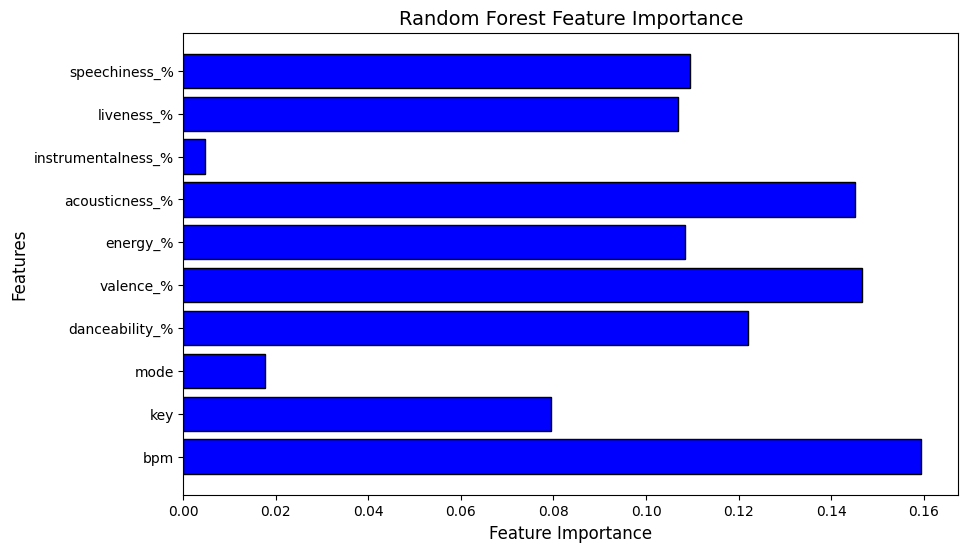

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
features = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = df[features]
y = df['streams']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='blue', edgecolor='black')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.show()


In this section, we trained a Random Forest Regressor model to analyze the importance of various audio features in predicting the number of streams for songs. By splitting the dataset into training and testing sets, the model is trained to understand how features like bpm, danceability_%, and acousticness_% contribute to the target variable 'streams'. The feature importance values extracted from the model highlight the relative influence of each feature in predicting streams. From the plot, we observed that bpm is the most critical factor, followed closely by valence_%, acousticness_%, and danceability_%. In contrast, features like instrumentalness_% had a minimal impact. This plot analysis, along with the feature distribution graphs from the first section of plots have shown the most influential features for song creation, as well as the 'ideal' ranges for the features when being directly compared to streaming popularity. 

In [36]:
# Classify features into high, medium, and low ranges based on percentiles
def classify_feature_ranges(df, features):
    for feature in features:
        # Calculate thresholds for 33rd and 66th percentiles
        low_threshold = df[feature].quantile(0.33)
        high_threshold = df[feature].quantile(0.66)
        
        # Create a new column for classified ranges
        df[f'{feature}_range'] = df[feature].apply(
            lambda x: 'low' if x <= low_threshold else
                      'medium' if x <= high_threshold else
                      'high'
        )
    return df

# Apply classification to the dataset
non_target_features = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 
                       'energy_%', 'acousticness_%', 'instrumentalness_%', 
                       'liveness_%', 'speechiness_%']
df = classify_feature_ranges(df, non_target_features)

# Display the first few rows to verify
df.head()

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,...,bpm_range,key_range,mode_range,danceability_%_range,valence_%_range,energy_%_range,acousticness_%_range,instrumentalness_%_range,liveness_%_range,speechiness_%_range
0,141381703.0,125,2,0,80.0,89.0,83.0,31.0,0.0,8.0,...,medium,low,low,high,high,high,medium,low,low,low
1,133716286.0,92,3,0,71.0,61.0,74.0,7.0,0.0,10.0,...,low,low,low,medium,medium,high,low,low,low,low
2,140003974.0,138,7,0,51.0,32.0,53.0,17.0,0.0,31.0,...,high,medium,low,low,low,low,medium,low,high,medium
3,800840817.0,170,0,0,55.0,58.0,72.0,11.0,0.0,11.0,...,high,low,low,low,medium,medium,medium,low,low,high
4,303236322.0,144,0,1,65.0,23.0,80.0,14.0,63.0,11.0,...,high,low,medium,medium,low,high,medium,high,low,medium


Next we classified numerical features into categorical ranges (low, medium, and high) based on their values relative to the 33rd and 66th percentiles. For each feature, thresholds are calculated, and a new column is added to the dataset to indicate the range category for each data point. This approach transforms continuous variables into discrete categories, making it easier to interpret patterns or relationships within the data. By applying this classification to multiple non-target features, the dataset now contains feature ranges with meaningful groupings that can be used for further analysis or modeling. In the next section of our code, we will use these groupings to help identify trends, or how a combination of feature ranges influence a song's streaming performance.

Analyzing: bpm_range and danceability_%_range


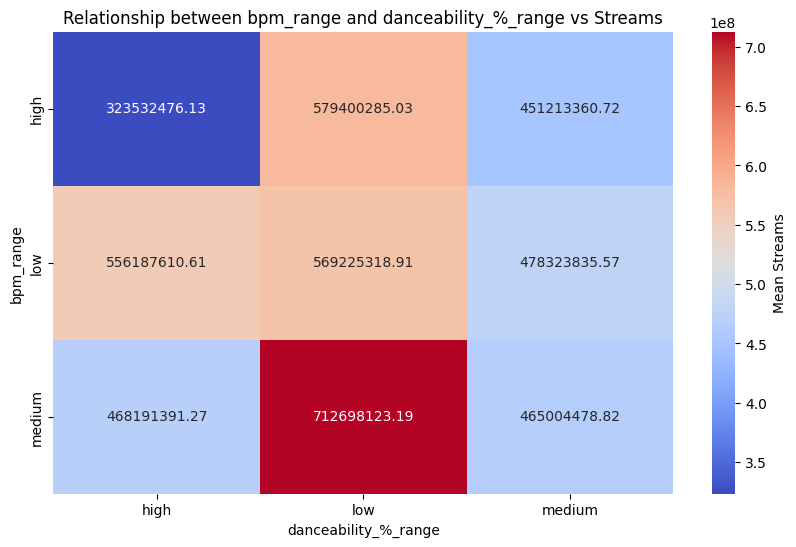

Analyzing: bpm_range and valence_%_range


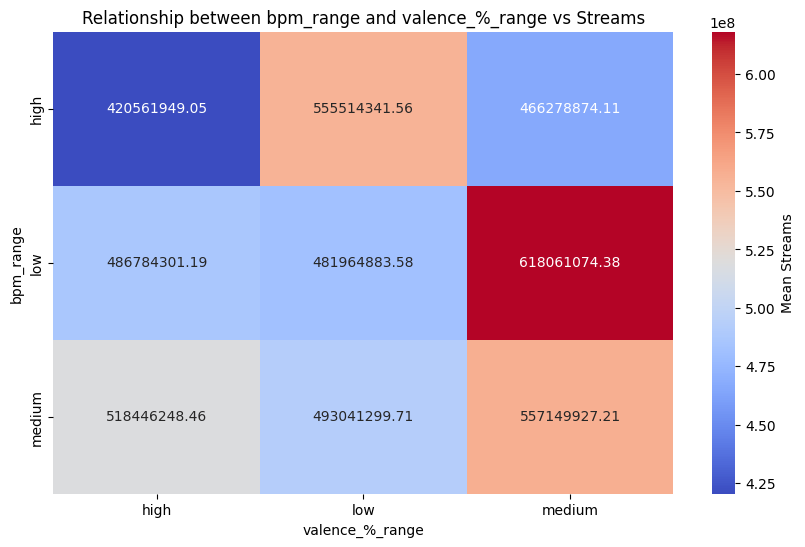

Analyzing: bpm_range and energy_%_range


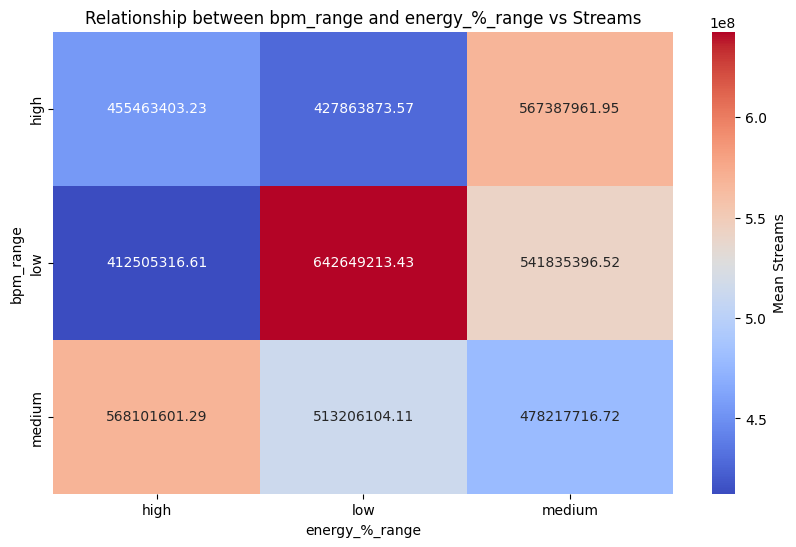

Analyzing: bpm_range and acousticness_%_range


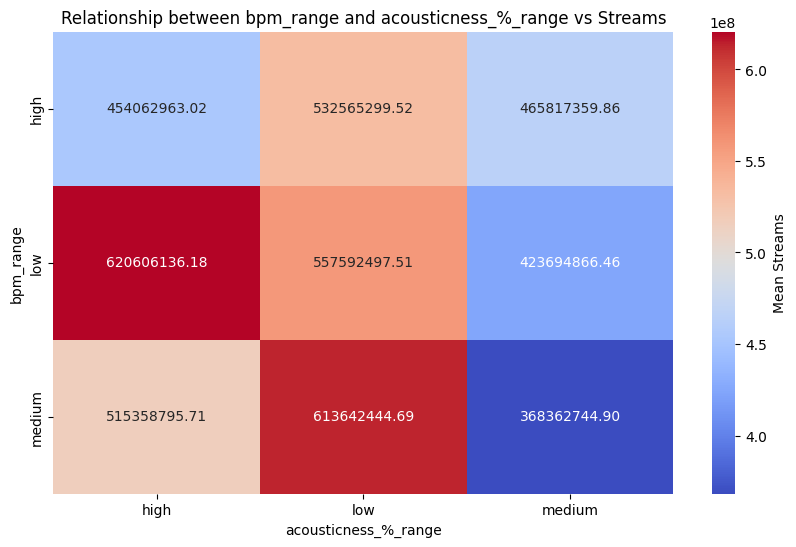

Analyzing: bpm_range and instrumentalness_%_range


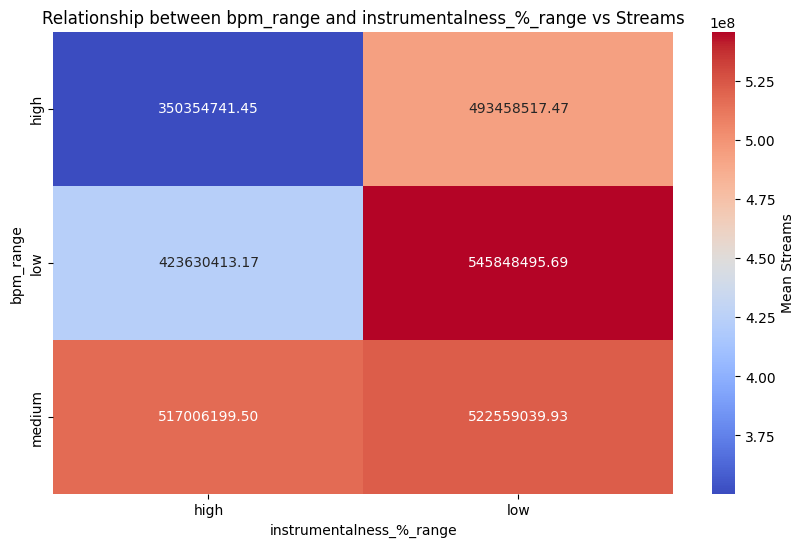

Analyzing: bpm_range and liveness_%_range


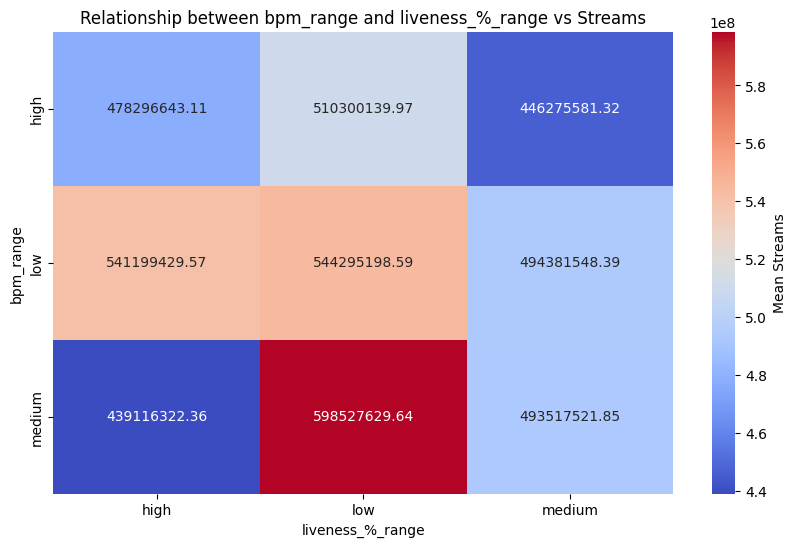

Analyzing: bpm_range and speechiness_%_range


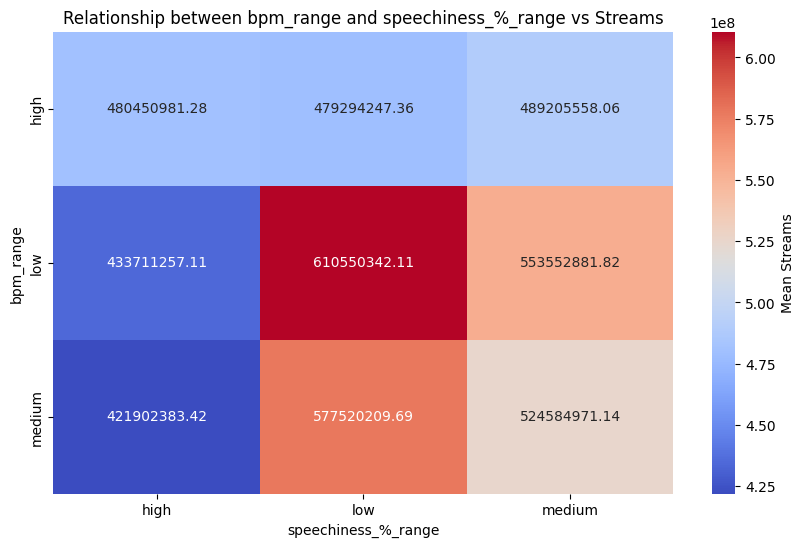

Analyzing: danceability_%_range and valence_%_range


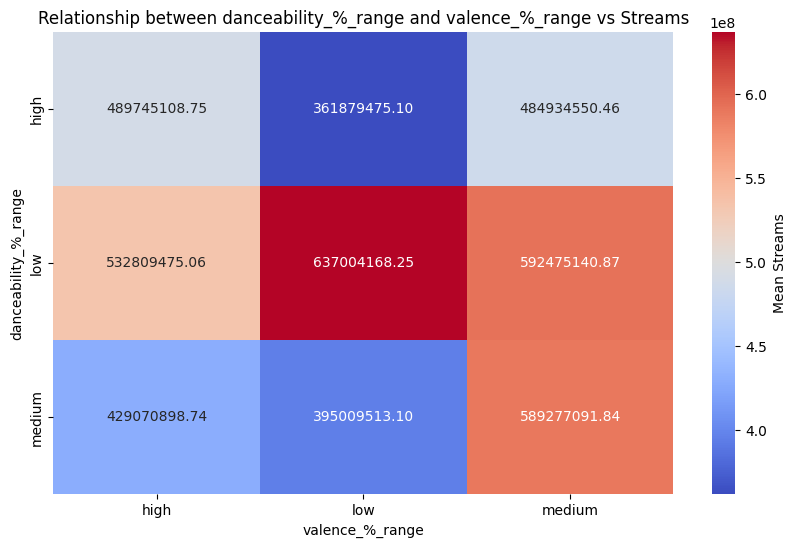

Analyzing: danceability_%_range and energy_%_range


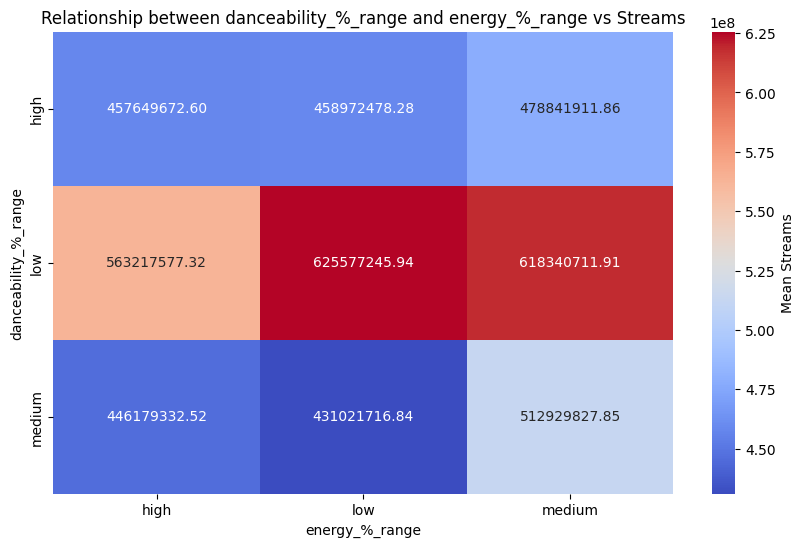

Analyzing: danceability_%_range and acousticness_%_range


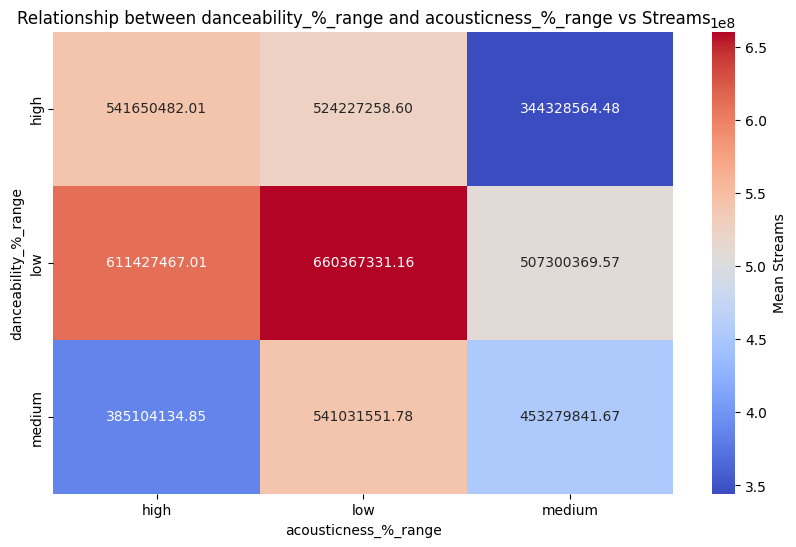

Analyzing: danceability_%_range and instrumentalness_%_range


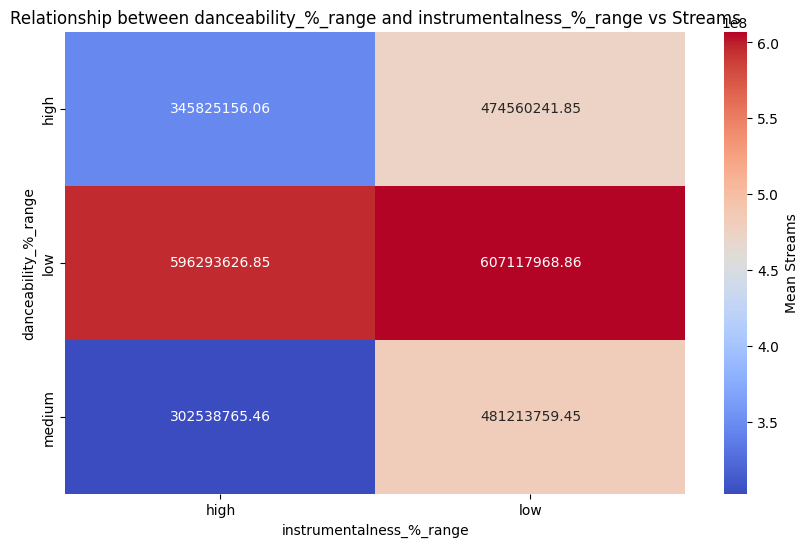

Analyzing: danceability_%_range and liveness_%_range


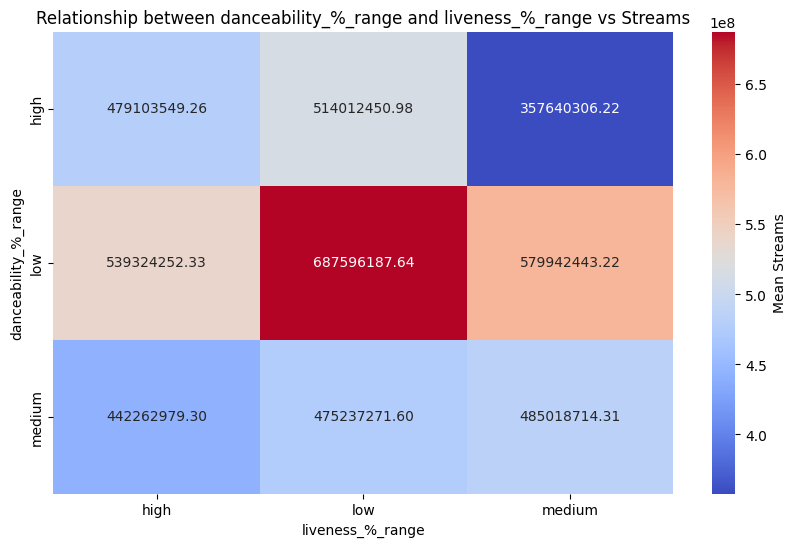

Analyzing: danceability_%_range and speechiness_%_range


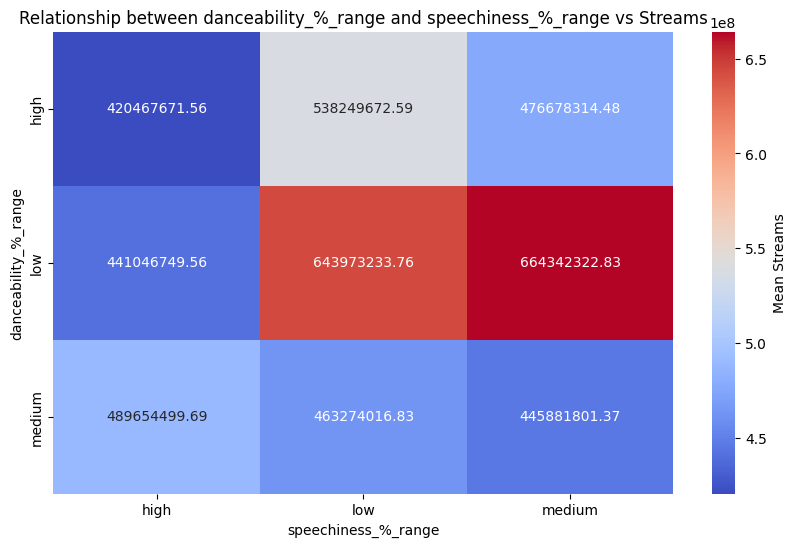

Analyzing: valence_%_range and energy_%_range


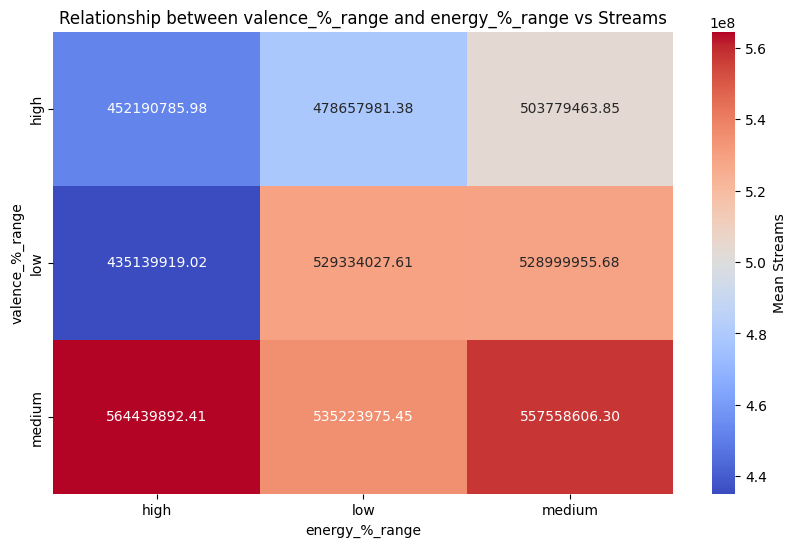

Analyzing: valence_%_range and acousticness_%_range


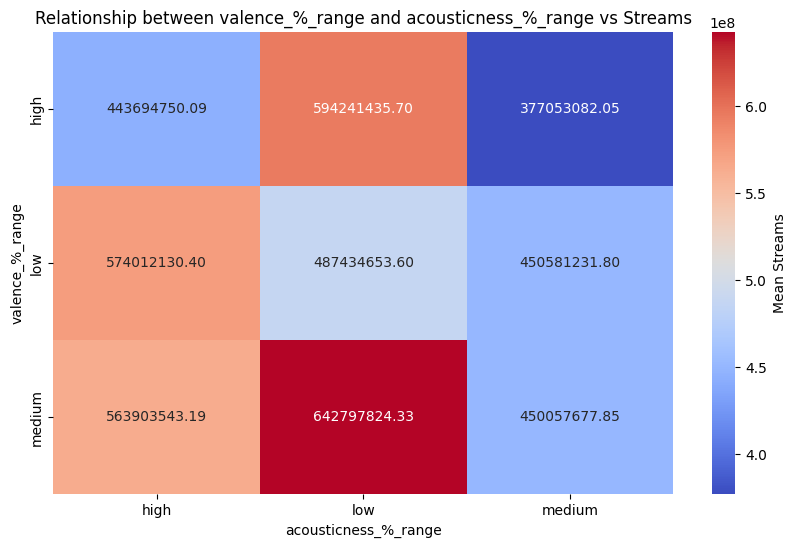

Analyzing: valence_%_range and instrumentalness_%_range


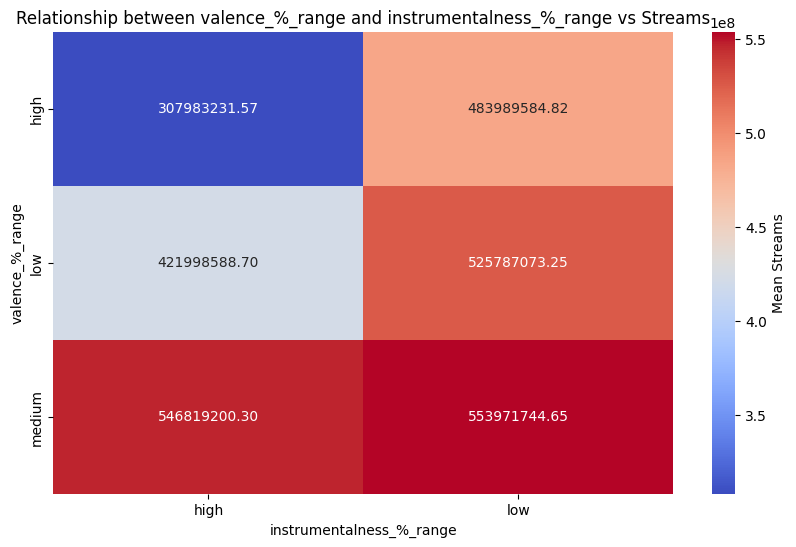

Analyzing: valence_%_range and liveness_%_range


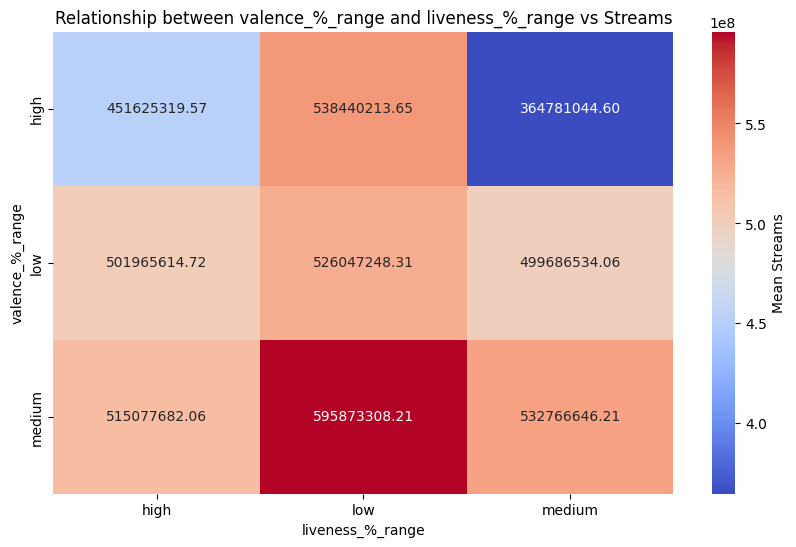

Analyzing: valence_%_range and speechiness_%_range


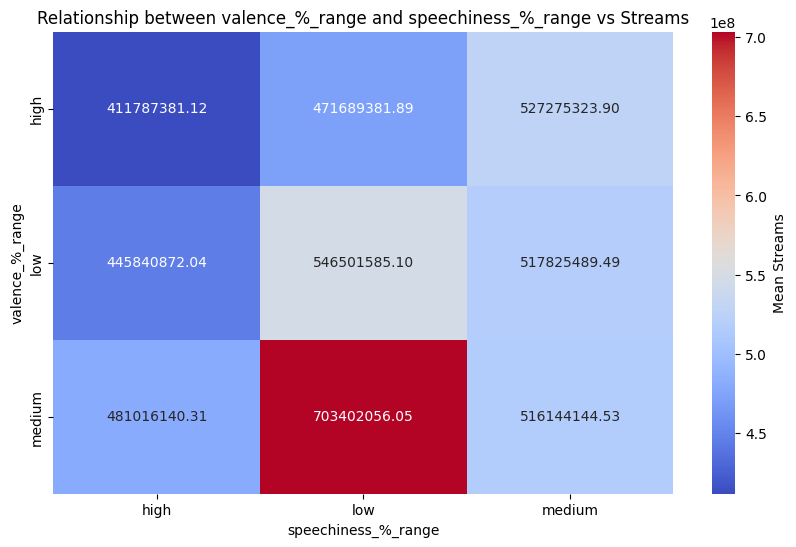

Analyzing: energy_%_range and acousticness_%_range


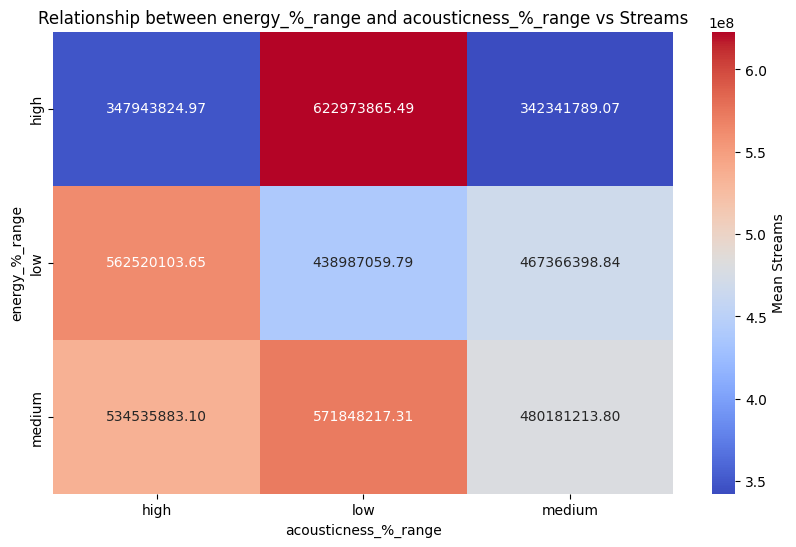

Analyzing: energy_%_range and instrumentalness_%_range


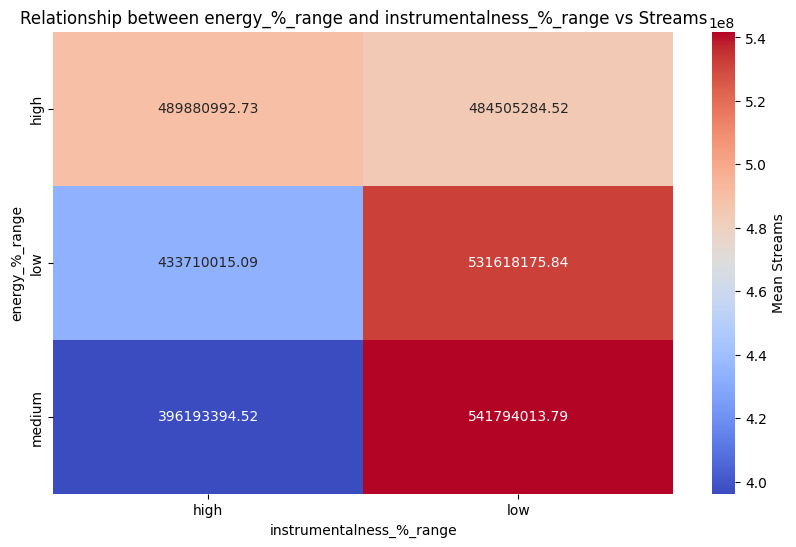

Analyzing: energy_%_range and liveness_%_range


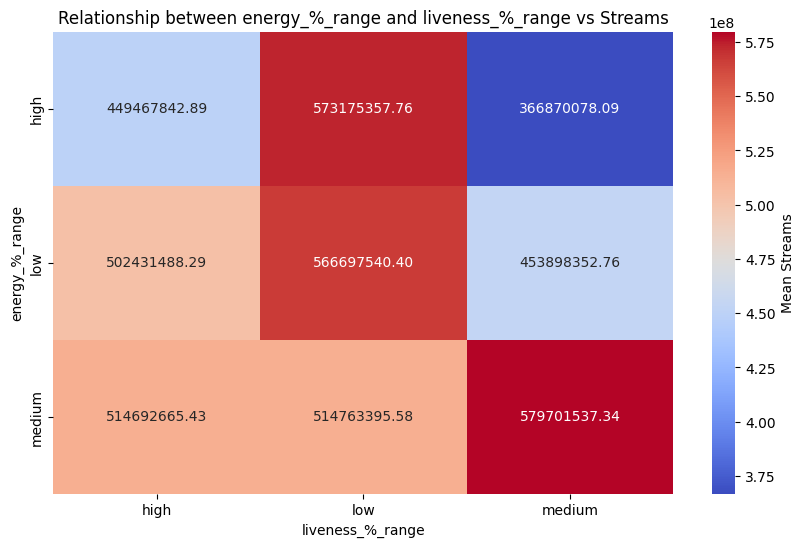

Analyzing: energy_%_range and speechiness_%_range


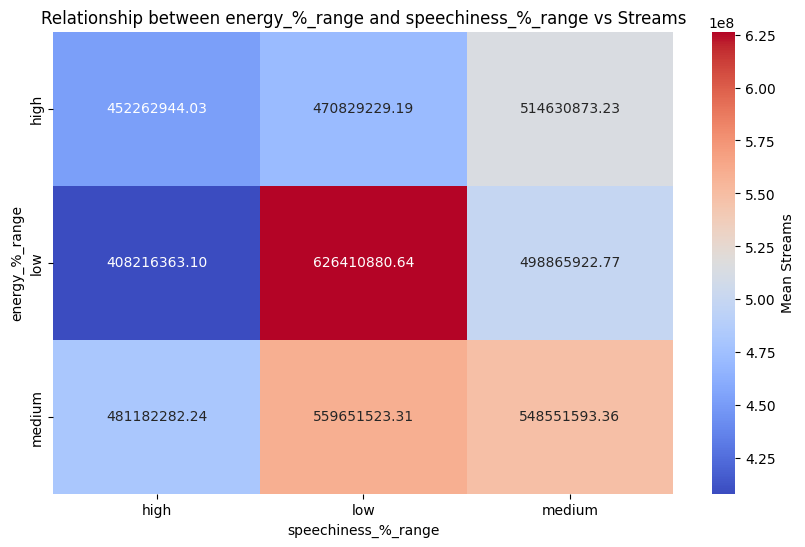

Analyzing: acousticness_%_range and instrumentalness_%_range


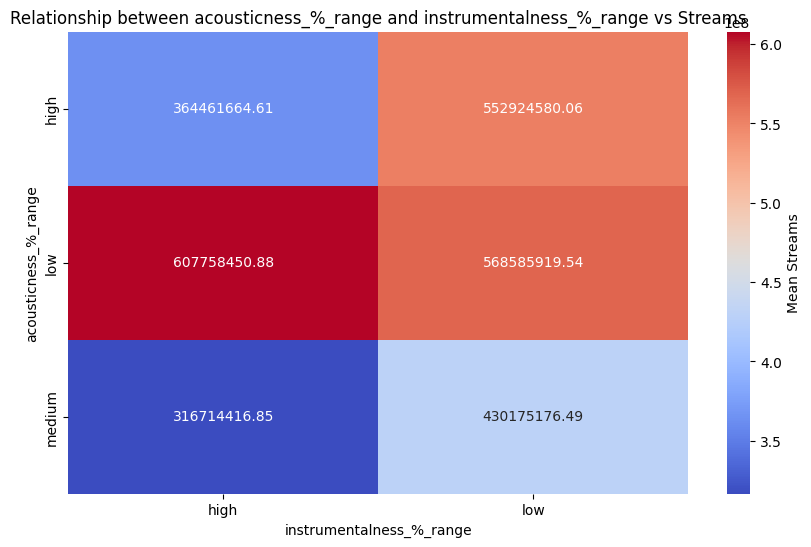

Analyzing: acousticness_%_range and liveness_%_range


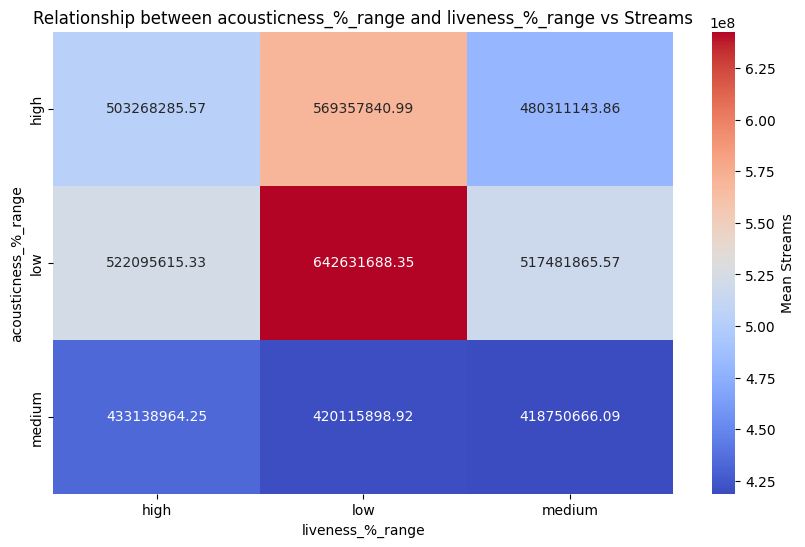

Analyzing: acousticness_%_range and speechiness_%_range


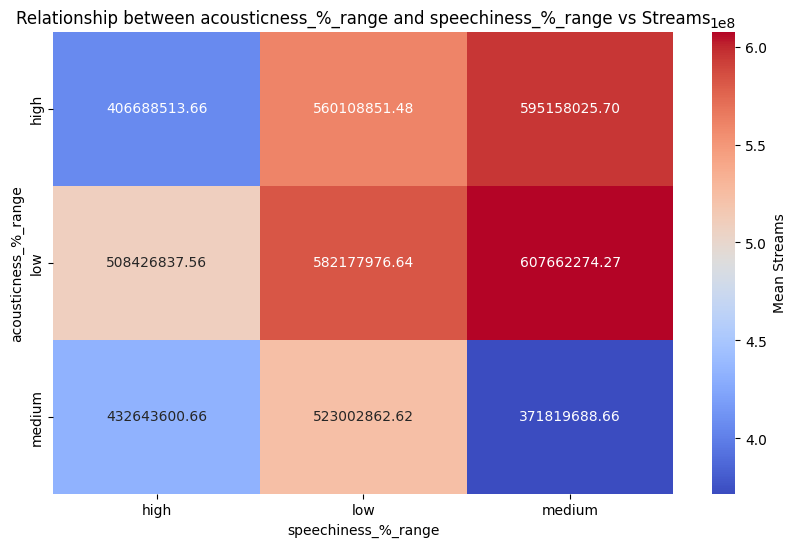

Analyzing: instrumentalness_%_range and liveness_%_range


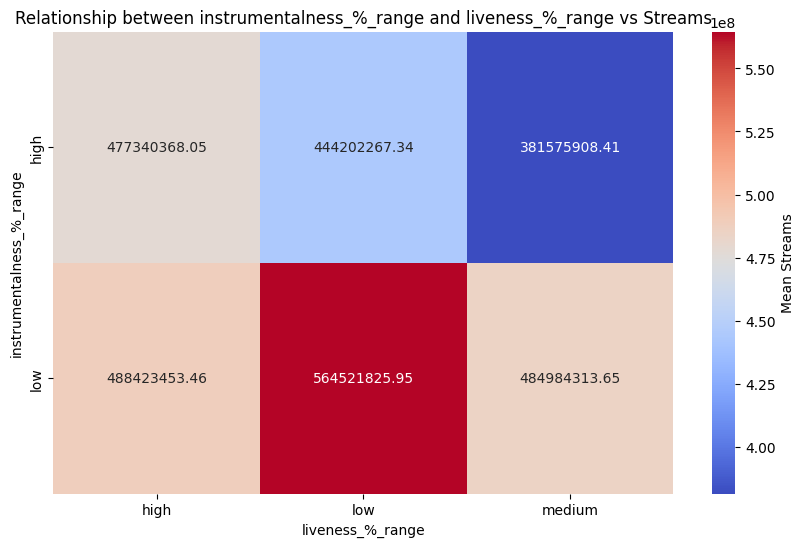

Analyzing: instrumentalness_%_range and speechiness_%_range


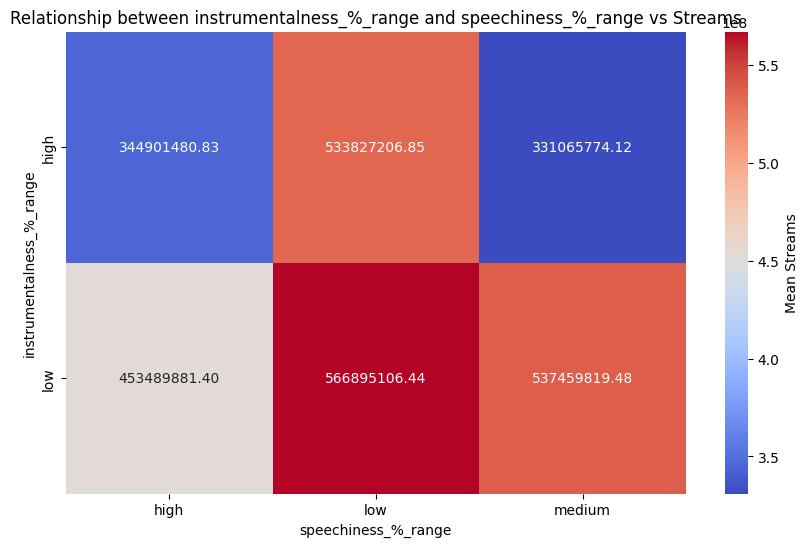

Analyzing: liveness_%_range and speechiness_%_range


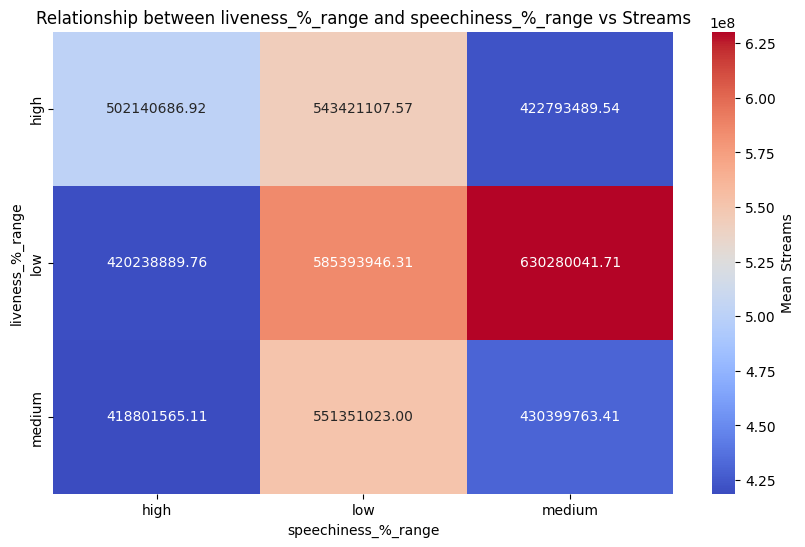

In [39]:
# Function to analyze combinations of two features
def analyze_combinations(df, feature1, feature2):
    # Group by the combinations of feature1 and feature2 and calculate the mean streams
    result = df.groupby([feature1, feature2])['streams'].agg(['mean', 'median', 'count']).reset_index()
    return result

# Function to plot heatmap
def plot_heatmap(result, feature1, feature2):
    # Pivot the result dataframe to create a matrix for heatmap
    pivot_table = result.pivot_table(index=feature1, columns=feature2, values='mean', aggfunc='mean')
    
    # Create a heatmap for visual representation
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Mean Streams'})
    plt.title(f'Relationship between {feature1} and {feature2} vs Streams')
    plt.ylabel(feature1)
    plt.xlabel(feature2)
    plt.show()

# List of classified features with '_range' suffix
classified_features = ['bpm_range', 'danceability_%_range', 'valence_%_range', 'energy_%_range', 
                       'acousticness_%_range', 'instrumentalness_%_range', 'liveness_%_range', 'speechiness_%_range']

# Loop through all unique pairs of features
from itertools import combinations
feature_pairs = list(combinations(classified_features, 2))

# Analyze combinations and plot heatmaps
for feature1, feature2 in feature_pairs:
    print(f"Analyzing: {feature1} and {feature2}")
    result = analyze_combinations(df, feature1, feature2)
    plot_heatmap(result, feature1, feature2)

This section examines the interaction between pairs of categorized features and their impact on the target variable streams. By grouping the dataset based on the combinations of two classified feature ranges, we calculated the mean, median, and count of streams for each pair. This aggregation provides a summary of how the interaction of different feature ranges influences streaming numbers. The results are then visualized as heatmaps, which use a color gradient to depict the mean streams for each feature combination. These heatmaps enable quick identification of patterns or synergies between feature ranges that drive higher or lower streaming numbers. For instance, we can see that from the first heat map, the average streams is the highest when bpm is in the medium range, and the danceability is in the low range. This analysis could aid music producers when trying to derive relationships between a pair of features in order to produce songs with large predicted streaming numbers. 

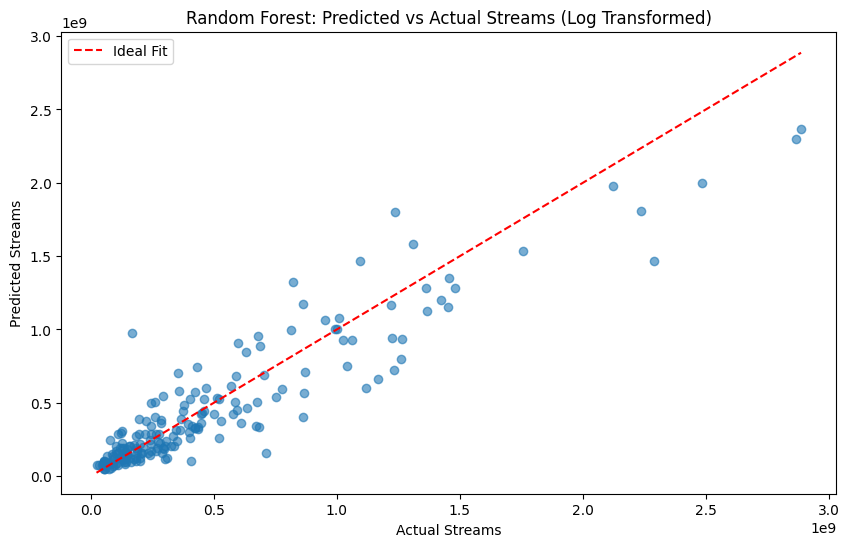

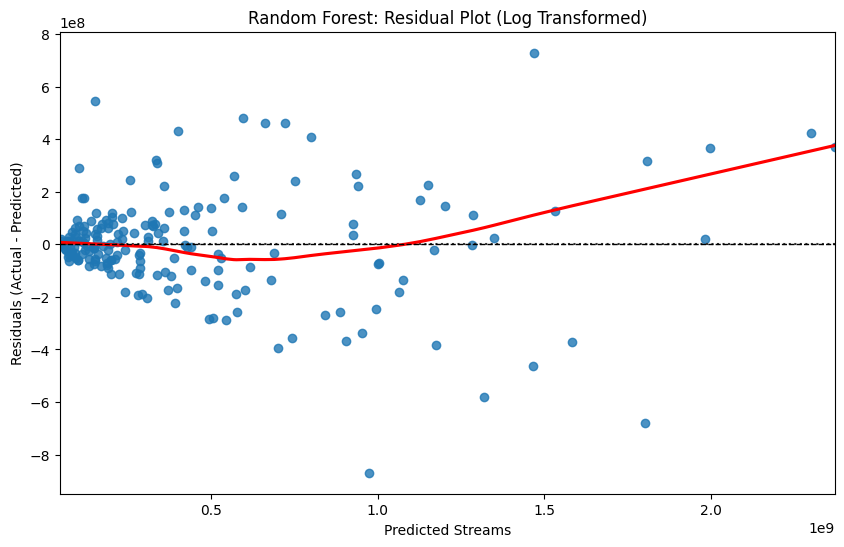

Random Forest Model Performance:
 RMSE: 200,365,289.45
 R²: 0.8518


In [41]:
# Reload the dataset
spotify_data = pd.read_csv('Spotify Most Streamed Songs.csv')

# Preprocessing: Convert numeric columns and handle missing values
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data['in_deezer_playlists'] = pd.to_numeric(
    spotify_data['in_deezer_playlists'].replace({',': ''}, regex=True), errors='coerce'
)
spotify_data.fillna({
    'key': 'Unknown',
    'mode': 'Unknown',
    'streams': spotify_data['streams'].median()
}, inplace=True)

# One-hot encode categorical columns
spotify_encoded = pd.get_dummies(spotify_data, columns=['key', 'mode'], drop_first=True)

# Add engineered features
spotify_encoded['song_age'] = 2024 - spotify_encoded['released_year']
spotify_encoded['bpm_energy_ratio'] = spotify_encoded['bpm'] / (spotify_encoded['energy_%'] + 1e-5)

# Clean the `in_shazam_charts` column by removing commas and converting to numeric
spotify_encoded['in_shazam_charts'] = spotify_encoded['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

# Handle missing values again (without inplace)
spotify_encoded['in_shazam_charts'] = spotify_encoded['in_shazam_charts'].fillna(spotify_encoded['in_shazam_charts'].median())

# Re-run the Random Forest model pipeline
X = spotify_encoded.drop(columns=['streams', 'track_name', 'artist(s)_name', 'cover_url'])
y_log = np.log1p(spotify_encoded['streams'])

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train Random Forest with log-transformed target
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred_log = rf_model.predict(X_test)

# Transform predictions back to original scale
rf_y_pred = np.expm1(rf_y_pred_log)

# Evaluate Random Forest model
from sklearn.metrics import root_mean_squared_error
rf_rmse = root_mean_squared_error(np.expm1(y_test), rf_y_pred)
rf_r2 = r2_score(np.expm1(y_test), rf_y_pred)

# Calculate residuals
residuals = np.expm1(y_test) - rf_y_pred

# Scatter Plot: Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), rf_y_pred, alpha=0.6)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
         [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--', label="Ideal Fit")
plt.title('Random Forest: Predicted vs Actual Streams (Log Transformed)')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.legend()
plt.show()

# Residual Plot: Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=rf_y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Random Forest: Residual Plot (Log Transformed)')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

print(f"Random Forest Model Performance:\n RMSE: {rf_rmse:,.2f}\n R²: {rf_r2:.4f}")

Moving onto streaming prediction methods, a Random Forest model was created to predict song streaming numbers. We repeated the preprocessing steps such as handling missing values, one-hot encoding categorical variables, and created engineered features like song age and BPM-to-energy ratios. The target variable, streams was log-transformed to reduce skewness and stabilize variance. The predicted vs. actual plot shows that the Random Forest model was able to capture the general trend in streaming numbers, with points closely aligning along the ideal fit line, indicating reasonable predictive accuracy. The model was very accurate in predicting the streaming numbers for songs streamed less than 500 million times. The deviations from the ideal fit line suggest that the model still had a small amount of error, that incerases as the streaming numbers of the song increase.

The residual plot reveals the distribution of prediction errors. While residuals are centered around zero for most predictions, there is some systematic bias, as seen in the curved pattern of residuals. This indicates that the model may underperform for certain ranges of predicted values, especially at higher streaming numbers. The calculated RMSE of approximately 200 million streams and R² of 0.8518 demonstrate that the model explains a significant portion of the variance in streaming numbers. This level of accuracy furthers confirms our initial thoughts that music popularity cannot be determined only from song features alone. This model is able to predict a significant number of songs with a range of streaming numbers, however there are many external factors (artist popularity, music promotion, personal prefference, ect.) that also have a substantial impact on streaming numbers.

This Random Forest model was our most successful attempt at streaming predictions, accruately predicting the numbers within an 85% threshold, while concluding that the remaining 15% of streaming prediction values come from outside factors that were not available within our dataset.

C:\Users\swant\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 457369005766737920.0000 - mae: 455219904.0000 - val_loss: 661240520508440576.0000 - val_mae: 548141824.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 507277625257885696.0000 - mae: 481014240.0000 - val_loss: 661240383069487104.0000 - val_mae: 548141760.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 552703948159451136.0000 - mae: 510637280.0000 - val_loss: 661240314350010368.0000 - val_mae: 548141696.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 425807765009596416.0000 - mae: 450924736.0000 - val_loss: 661239970752626688.0000 - val_mae: 548141376.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 537056007910588416.0000 - mae: 491273056.0000 - val_loss: 661239352277336064.0000 - val_mae: 548140672.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 559077782705930240.0000 - mae: 505328832.0000 - val_loss: 661237909168324608.0000 - val_mae: 548139392.

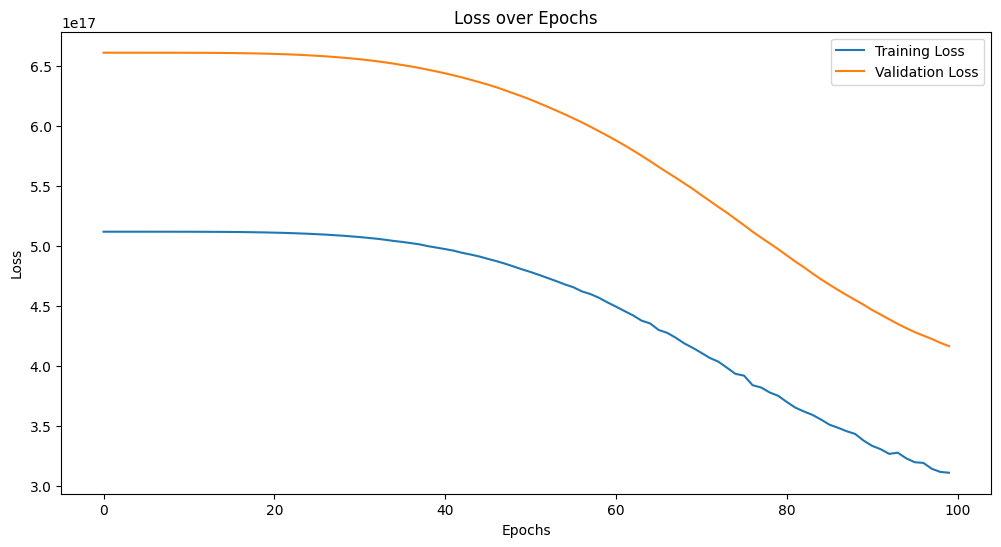

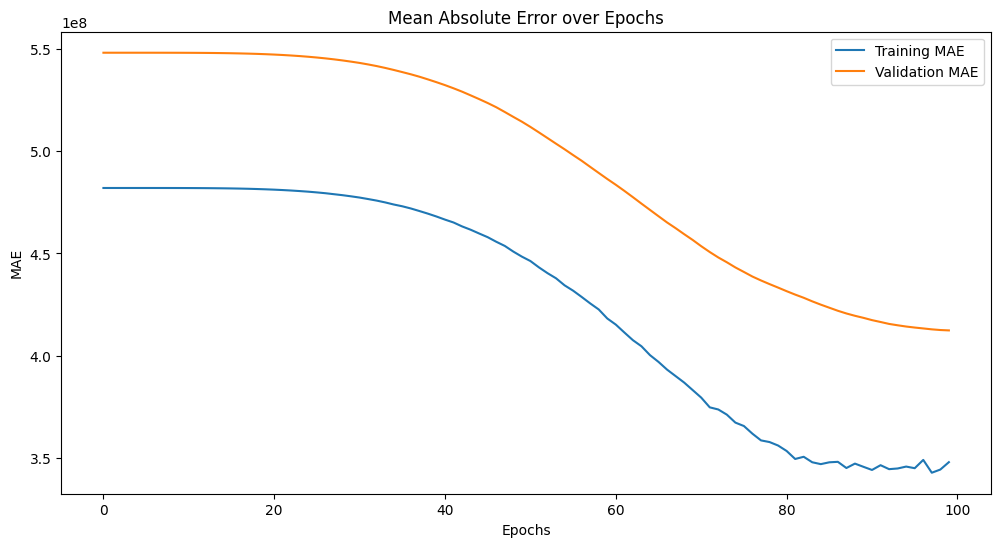

In [45]:
# Define numerical features to use for the Neural Network
numerical_features = [
    'danceability_%', 'energy_%', 'valence_%', 'bpm', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Ensure features and target variable are numeric
X = df[numerical_features]
y = df['streams']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Visualize Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Moving onto more prediction model implementation, we used a neural network to predict song streaming numbers using numerical features like danceability_% and energy_%. The model was trained over 100 epochs, with both training and validation metrics tracked to monitor performance. The first graph, showing loss over epochs, indicates that the training loss decreases steadily, reflecting the model’s improving fit to the training data. However, the loss was still an extremely high value indicating that the model's predictions deviate significantly from the actual target values. 

The second graph, depicting Mean Absolute Error (MAE) over epochs aligns with the loss plot, showing a similar gap between training and validation performance. The validation MAE decreases but plateaus at a higher level suggesting that while the model is learning, it struggles to achieve high accuracy on the validation set. The recorded metrics, including a high MSE and poor R² score, reinforce this observation, indicating the model's predictions are far from optimal and fail to explain the variance in the streaming numbers effectively. This poor performance in streaming prediction numbers led us back to focusing on the Random Forest model, allowing us to refine it further for more accurate prediction scores. 

In [53]:
# Log-transform the target variable
y_log = np.log1p(df['streams'])

# Feature engineering (if applicable)
X = df[numerical_features]  # Use numerical features as is

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define alternative models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma=0.1)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Reverse the log transformation
    # Evaluate the model
    mse = mean_squared_error(np.expm1(y_test), y_pred)
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    r2 = r2_score(np.expm1(y_test), y_pred)
    print(f"Mean Squared Error (MSE): {mse:,.2f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print()

--- Gradient Boosting ---
Mean Squared Error (MSE): 538,340,974,404,085,632.00
Mean Absolute Error (MAE): 452,545,400.41
R² Score: -0.2294

--- Support Vector Regression ---
Mean Squared Error (MSE): 529,473,514,441,452,736.00
Mean Absolute Error (MAE): 441,039,580.16
R² Score: -0.2091



In this section we evaluated the performance of two regression models. Gradient Boosting and Support Vector Regression were used in predicting song streaming numbers. By log-transforming the target variable streams, the model aims to stabilize variance and improve prediction accuracy. However, the results indicate poor performance for both models, with high Mean Squared Error and Mean Absolute Error values. Gradient Boosting slightly outperforms SVR in terms of MSE and MAE, but both models yield negative R² scores, indicating that the models perform worse than a simple mean-based prediction.
These results suggest that neither model is suitable for the current dataset in its current form. This once again confirmed to us that these models struggled with our dataset and we should continue to work on the Random Forest model. 

In [49]:
# Ensure 'X' and 'y' are defined appropriately before this section
# Assuming numerical features are already selected, and target is log-transformed as in "Combined Code"
X = df[numerical_features]  # Replace with the actual feature set
y = np.log1p(df['streams'])  # Apply log transformation to the target variable for consistency

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different regression models to be tested
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'BayesianRidge': BayesianRidge(),
    'LightGBM': LGBMRegressor(verbose=-1)
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Reverse the log transformation to get predictions in the original scale
    # Evaluate the model
    mse = mean_squared_error(np.expm1(y_test), y_pred)
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    r2 = r2_score(np.expm1(y_test), y_pred)
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })
    print(f"Mean Squared Error (MSE): {mse:,.2f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print()

# Display results summary
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("Model Performance Summary:")
print(results_df)

--- LinearRegression ---
Mean Squared Error (MSE): 523,960,988,780,198,784.00
Mean Absolute Error (MAE): 440,799,764.78
R² Score: -0.1965

--- Ridge ---
Mean Squared Error (MSE): 523,961,057,672,365,376.00
Mean Absolute Error (MAE): 440,799,748.17
R² Score: -0.1965

--- Lasso ---
Mean Squared Error (MSE): 528,587,520,147,332,160.00
Mean Absolute Error (MAE): 441,251,881.33
R² Score: -0.2071

--- ElasticNet ---
Mean Squared Error (MSE): 527,023,579,331,902,144.00
Mean Absolute Error (MAE): 440,333,086.52
R² Score: -0.2035

--- RandomForest ---
Mean Squared Error (MSE): 527,915,631,764,265,472.00
Mean Absolute Error (MAE): 442,326,307.40
R² Score: -0.2056

--- GradientBoosting ---
Mean Squared Error (MSE): 537,651,742,170,112,064.00
Mean Absolute Error (MAE): 451,824,956.76
R² Score: -0.2278

--- XGBoost ---
Mean Squared Error (MSE): 566,587,368,979,958,208.00
Mean Absolute Error (MAE): 478,004,239.76
R² Score: -0.2939

--- AdaBoost ---
Mean Squared Error (MSE): 508,656,780,176,863,872.0

This last section of code demonstrates all the methods we tried when trying to predict a songs streaming numbers. All of these metrics indicated to us that they performed very poorly on our dataset and that the Random Forest model was going to be the best option. 